# Check max flow = 454.54526   (Monkaa = 23540.129)

In [1]:
import os
from ptlflow.utils.flow_utils import flow_read, flow_to_rgb
from ptlflow.utils.external.flowpy import replace_nans
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image


/opt/conda/envs/b2f/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[!!alt_cuda_corr is not compiled!!]


# Flow distribution

# Gopro

 61%|███████████████████████▊               | 2574/4206 [01:12<00:46, 35.21it/s]

002570


100%|███████████████████████████████████████| 4206/4206 [01:58<00:00, 35.54it/s]


210.29102


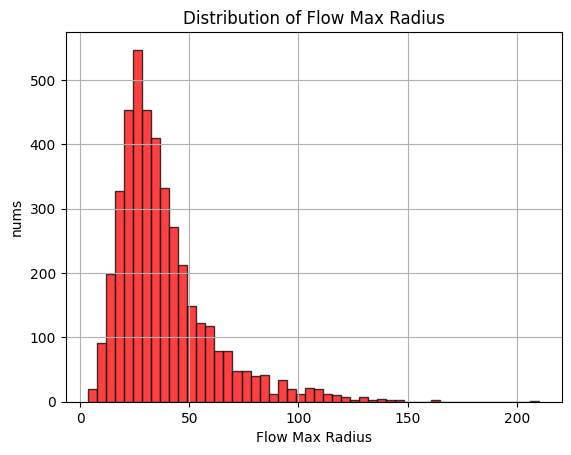

In [3]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming flow_read and replace_nans are defined functions
# from your existing codebase, e.g.,
# from your_module import flow_read, replace_nans

data_path = '/workspace/data/Gopro_my/train'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    flow_max_radius_list.append(flow_max_radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius
    # if flow_max_radius > 200:
    #     print(scene)


print(master_max)

# Plotting the histogram of flow_max_radius
plt.hist(flow_max_radius_list, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Flow Max Radius')
plt.xlabel('Flow Max Radius')
plt.ylabel('nums')
plt.grid(True)
plt.show()


In [4]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming flow_read and replace_nans are defined functions
# from your existing codebase, e.g.,
# from your_module import flow_read, replace_nans

data_path = '/workspace/Marigold/dataset/train/train_vimeo+monkaa_B.txt'
data_folder = []
with open (data_path, 'r') as f:
    for lin in f:
        data_folder.append(lin.strip())


master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80): # '/workspace/data/Monkaa_my/train/015043/blur/015043.png'
    flow_path = os.path.join(scene, 'flow/flows', f'{scene}.pfm')
    print(flow_path)
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    flow_max_radius_list.append(flow_max_radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius
    # if flow_max_radius > 200:
    #     print(scene)


print(master_max)

# Plotting the histogram of flow_max_radius
plt.hist(flow_max_radius_list, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Flow Max Radius')
plt.xlabel('Flow Max Radius')
plt.ylabel('nums')
plt.grid(True)
plt.show()


  0%|                                                | 0/195238 [00:00<?, ?it/s]

/workspace/data/vimeo/train/000001/blur/000001.png.pfm


FileNotFoundError: [Errno 2] No such file or directory: '/workspace/data/vimeo/train/000001/blur/000001.png.pfm'

In [9]:
data_folder[-2]

'/workspace/data/Monkaa_my/train/015043/blur/015043.png'

In [29]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

data_path = '/workspace/data/Gopro_my/test'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)

    u, v = flow[:,:,0], flow[:,:,1]
    magnitude = np.sqrt(u**2 + v**2)
    max_magnitude = np.max(magnitude)

    print(flow_max_radius, max_magnitude)
    break







  0%|                                                  | 0/2222 [00:00<?, ?it/s]

29.007277 29.007277


# Gopro

In [3]:
import os,glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

002104


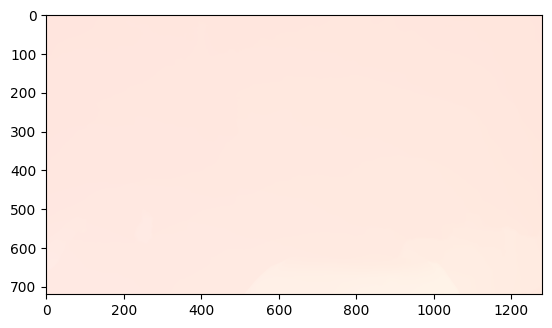

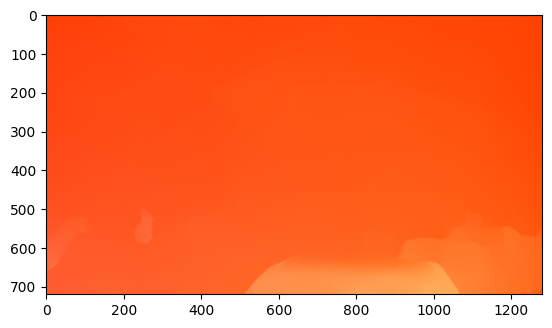

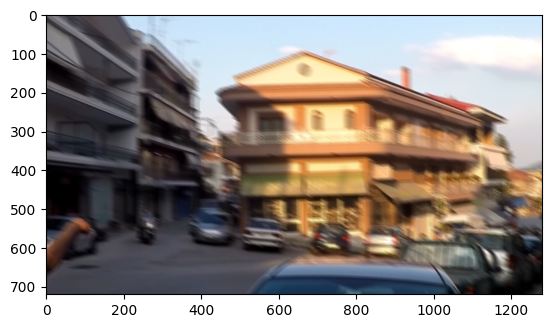

19.920195
(1280, 720)


In [9]:
gopro_path = '/workspace/data/Gopro_my/train'
gopro_folder = os.listdir(gopro_path)
gopro_folder.sort()

for scene in gopro_folder[2103:]:
    print(scene)
    flow_path = os.path.join(gopro_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    flow_rgb = flow_to_rgb(flow,flow_max_radius=150)
    flow_rgb_2 = flow_to_rgb(flow)


    blur_img = os.path.join(gopro_path,scene,'blur',f'{scene}.png')
    blur = Image.open(blur_img)
    blur = np.array(blur)
    blur = Image.fromarray(blur)

    plt.imshow(flow_rgb)
    plt.show()
    plt.imshow(flow_rgb_2)
    plt.show()
    plt.imshow(blur)
    plt.show()

    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    print(flow_max_radius)
    print(blur.size)
    break

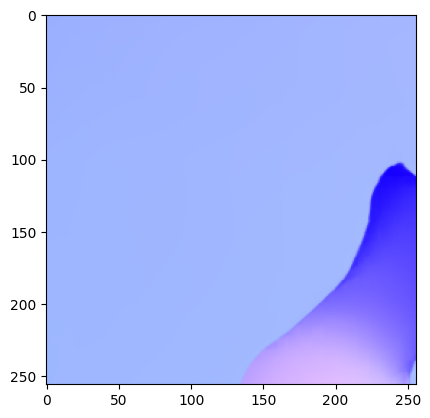

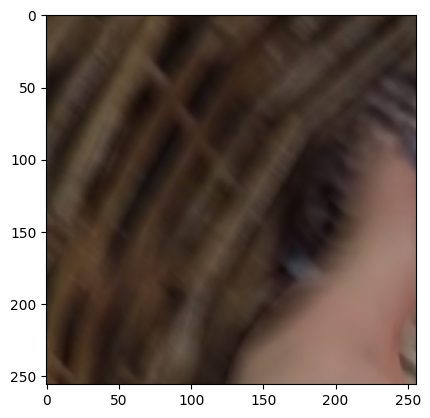

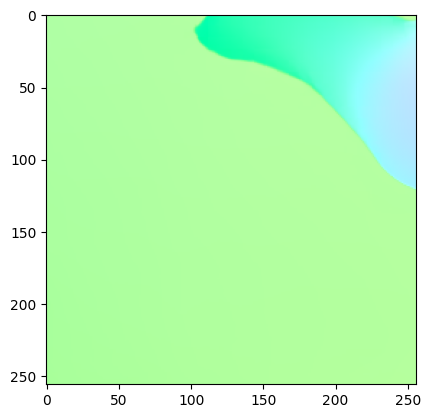

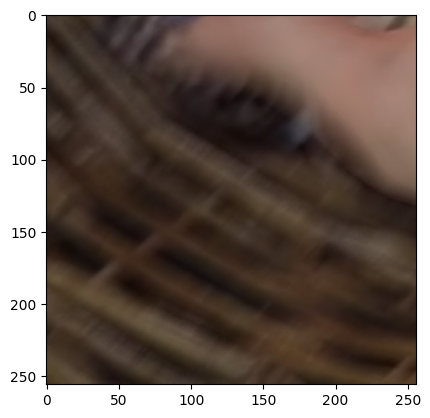

In [9]:
def augment_flow(image, command, is_flow=False):
    if command == 'hflip':  # horizontal flip
        image = np.fliplr(image)
        if is_flow:
            image = np.fliplr(image)
            image[:, :, 0] *= -1  # Flip horizontal flow direction

    elif command == 'vflip':  # vertical flip
        image = np.flipud(image)
        if is_flow:
            image[:, :, 1] *= -1  # Flip vertical flow direction

    elif command == 'rot90':  # 90-degree rotation
        image = np.rot90(image)
        if is_flow:
            # Swap the flow directions and invert the new vertical component
            image = image[:, :, [1, 0]]
            image[:, :, 1] *= -1

    else:
        raise ValueError("Wrong command!")

    return image

def normalize_flow_to_tensor(flow):

    # Calculate the magnitude of the flow vectors
    u, v = flow[:,:,0], flow[:,:,1]
    magnitude = np.sqrt(u**2 + v**2)
    
    # Avoid division by zero by setting small magnitudes to a minimal positive value
    magnitude[magnitude == 0] = 1e-8
    
    # Normalize u and v components to get unit vectors for x and y
    x = u / magnitude
    y = v / magnitude

    # Set M to the largest blur magnitude in the set (maximum of the magnitude array)
    M = magnitude.max()
    
    # Normalize the magnitude to [0, 1] range for the z component
    z = magnitude / 147
    z = np.clip(z, 0, 1) 


    # Stack x, y, and z to create the 3D tensor C with shape (H, W, 3)
    C = np.stack((x, y, z), axis=-1)

    return C
import cv2

command = 'rot90'
flow_path = '/workspace/data/Gopro_my/train/000500/flow/flows/000500.flo'
blur_path = '/workspace/data/Gopro_my/train/000500/blur/000500.png'
flow = flow_read(flow_path)
flow = flow[:256,:256]

before_flow = flow_to_rgb(flow)
plt.imshow(before_flow)
plt.show()

blur_img = cv2.imread(blur_path)
blur_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2RGB)
blur_img = blur_img[:256,:256,:]
plt.imshow(blur_img)
plt.show()

after_flow = augment_flow(flow, command=command, is_flow = True)
after_flow = flow_to_rgb(after_flow)
plt.imshow(after_flow)
plt.show()

blur_img = augment_flow(blur_img,command=command)
plt.imshow(blur_img)
plt.show()

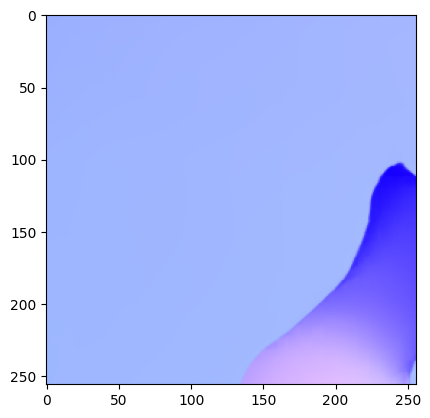

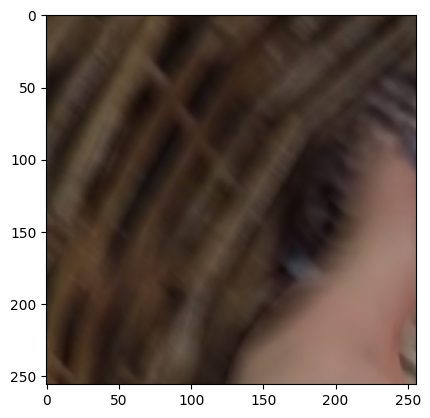

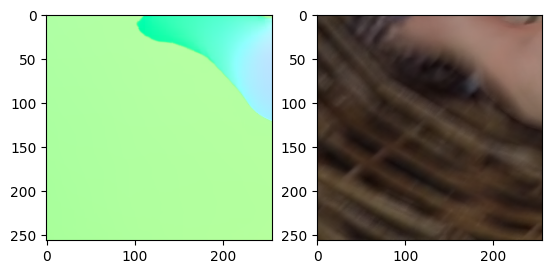

In [3]:
import cv2

flow_path = '/workspace/data/Gopro_my/train/000500/flow/flows/000500.flo'
blur_path = '/workspace/data/Gopro_my/train/000500/blur/000500.png'
flow = flow_read(flow_path)
flow = flow[:256,:256]
original_flow = flow_to_rgb(flow)
plt.imshow(original_flow)
plt.show()


blur_img = cv2.imread(blur_path)
blur_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2RGB)
blur_img = blur_img[:256,:256,:]
plt.imshow(blur_img)
plt.show()

# Blur Image 가로 반전
blur_image = np.rot90(blur_img)

# Optical Flow 가로 반전
# flow = np.fliplr(flow)
# flow[:, :, 0] *= -1  # X 축 성분의 부호 반전

flow = np.rot90(flow)
flow = flow[:, :, [1, 0]]
flow[:, :, 1] *= -1
flow_img = flow_to_rgb(flow)

# 확인을 위해 두 이미지 다시 표시
plt.subplot(1, 2, 1)
plt.imshow(flow_img)
plt.subplot(1, 2, 2)
plt.imshow(blur_image)
plt.show()


In [11]:
print(np.max(flow[:,:,0]))
print(np.min(flow[:,:,0]))

print(np.max(flow[:,:,1]))
print(np.min(flow[:,:,1]))

print(np.max(flow[:,:,2]))
print(np.min(flow[:,:,2]))

0.3073545
-0.9396733
0.99999976
0.3420734
0.24872354
0.046399385


In [4]:
import os
path = '/workspace/data/Gopro_my/test'
folder = os.listdir(path)
folder.sort()

with open('text.txt', 'a') as f:
    for scene in folder:
        blur_path = os.path.join(path,scene,'blur',f'{scene}.png')
        f.write(f'{blur_path}\n')


In [1]:
import os
from ptlflow.utils import flow_utils
import numpy as np

mother_path = '/workspace/data/results/C/Gopro/train'
folder = os.listdir(mother_path)
folder.sort()
cnt = 0
data = 0

def normalize_flow(flow):

    # Calculate the magnitude of the flow vectors
    u, v = flow[:,:,0], flow[:,:,1]
    magnitude = np.sqrt(u**2 + v**2)
    
    # Avoid division by zero by setting small magnitudes to a minimal positive value
    magnitude[magnitude == 0] = 1e-8
    
    # Normalize u and v components to get unit vectors for x and y
    x = u / magnitude
    y = v / magnitude

    # Normalize the magnitude to [0, 1] range for the z component
    z = magnitude / 100  # 100
    z = np.clip(z, 0, 1)
    z = z * 2 - 1


    # Stack x, y, and z to create the 3D tensor C with shape (H, W, 3)
    C = np.stack((x, y, z), axis=-1)

    return C

for scene in folder:
    scene_folder = os.listdir(os.path.join(mother_path,scene))
    if len(scene_folder) == 0:
        flow_path = f'/workspace/data/Gopro_my/train/{scene}/flow/flows/{scene}.flo'
        new_scene = int(scene) + 2103
        new_scene = str(new_scene).zfill(6)

        l_flow = flow_utils.flow_read(flow_path)
        l_flow = normalize_flow(l_flow)
        np.savez_compressed(f'/workspace/data/results/C/Gopro/train/{scene}/1.npz',l_flow)

        r_flow_path = f'/workspace/data/Gopro_my/train/{new_scene}/flow/flows/{new_scene}.flo'
        r_flow = flow_utils.flow_read(r_flow_path)
        r_flow = normalize_flow(r_flow)
        np.savez_compressed(f'/workspace/data/results/C/Gopro/train/{scene}/2.npz',r_flow)

        cnt += 1

    else:

        data += len(scene_folder)


    


print(cnt)
print(data)

/opt/conda/envs/b2f/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[!!alt_cuda_corr is not compiled!!]
616
12005


# make gopro C dataset

In [47]:
mother_path = '/workspace/data/results/C/Gopro/train'
folder = os.listdir(mother_path)
folder.sort()
with open('train_C.txt', 'a') as file:
    for scene in folder:
        flows = os.listdir(os.path.join(mother_path,scene))
        flows.sort()
        for flow in flows:
            flow_path = os.path.join(mother_path,scene,flow)
            file.write(f'{flow_path}\n')

        break



In [49]:
a = np.load('/workspace/data/results/C/Gopro/train/000001/1.npz')
print(a['arr_0'])

[[[0.9336786  0.6812527  0.25769112]
  [0.93608165 0.6787166  0.23990658]
  [0.9396862  0.67491245 0.21322978]
  ...
  [0.93916285 0.68953675 0.13905147]
  [0.92452925 0.6968883  0.16467974]
  [0.91477424 0.701789   0.18176398]]

 [[0.9334295  0.6884374  0.22659597]
  [0.93546724 0.6854148  0.21453258]
  [0.9385239  0.6808809  0.19643751]
  ...
  [0.93352485 0.69398737 0.13650382]
  [0.9290345  0.7090615  0.14954135]
  [0.92604107 0.71911013 0.15823236]]

 [[0.93305576 0.69921446 0.17995325]
  [0.93454564 0.6954621  0.17647159]
  [0.93678045 0.6898336  0.17124912]
  ...
  [0.9250679  0.70066327 0.13268232]
  [0.9357922  0.72732127 0.12683374]
  [0.9429413  0.7450919  0.12293497]]

 ...

 [[0.90342647 0.6566192  0.08575773]
  [0.89735484 0.65965784 0.08795682]
  [0.8882475  0.6642158  0.0912554 ]
  ...
  [0.9165231  0.75760305 0.10648701]
  [0.9181148  0.7688753  0.11909267]
  [0.9191758  0.7763895  0.12749577]]

 [[0.8820206  0.6493975  0.13643473]
  [0.8849003  0.6566918  0.12373245]


In [ ]:
import h5py
import numpy as np
import os

root_path = '/workspace/data/GOPRO/test'
h5_folder = os.listdir(root_path)
h5_folder.sort()

for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    with h5py.File(h5_path, 'a') as f:
        print(f"\n### Inspecting file: {h5} ###")
        print("Existing keys:", list(f.keys()))
        imgs = f['images']
        
        imgs = f['images']
        for img in imgs:
            print(img)
            blur_img = imgs[f'{img}'][:]
            print(blur_img.shape)


### Inspecting file: GOPR0384_11_00.h5 ###
Existing keys: ['images', 'masks', 'sharp_images', 'voxels']
<KeysViewHDF5 ['images', 'masks', 'sharp_images', 'voxels']>
image000000000
(3, 720, 1280)
image000000001
(3, 720, 1280)
image000000002
(3, 720, 1280)
image000000003
(3, 720, 1280)
image000000004
(3, 720, 1280)
image000000005
(3, 720, 1280)
image000000006
(3, 720, 1280)
image000000007
(3, 720, 1280)
image000000008
(3, 720, 1280)
image000000009
(3, 720, 1280)
image000000010
(3, 720, 1280)
image000000011
(3, 720, 1280)
image000000012
(3, 720, 1280)
image000000013
(3, 720, 1280)
image000000014
(3, 720, 1280)
image000000015
(3, 720, 1280)
image000000016
(3, 720, 1280)
image000000017
(3, 720, 1280)
image000000018
(3, 720, 1280)
image000000019
(3, 720, 1280)
image000000020
(3, 720, 1280)
image000000021
(3, 720, 1280)
image000000022
(3, 720, 1280)
image000000023
(3, 720, 1280)
image000000024
(3, 720, 1280)
image000000025
(3, 720, 1280)
image000000026
(3, 720, 1280)
image000000027
(3, 720, 

In [24]:
import h5py
import numpy as np
import os

root_path = '/workspace/data/GOPRO/test'
h5_folder = os.listdir(root_path)
h5_folder.sort()

for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    with h5py.File(h5_path, 'a') as f:
        print(f"\n### Inspecting file: {h5} ###")
        print("Existing keys:", list(f.keys()))
        
        # 'images' 그룹에서 blur 이미지 불러오기
        imgs = f['images']
        
        # 새로운 'flow' 그룹 생성 (이미 존재하는지 확인)
        if 'flow' not in f:
            flow_group = f.create_group('flow')
            print("Created new group: 'flow'")
        else:
            flow_group = f['flow']
            print("Group 'flow' already exists.")

        # 각 이미지에 대응하는 flow 데이터 생성 및 저장
        for img in imgs:
            print(f"Processing image: {img}")
            blur_img = imgs[f'{img}'][:]  # 이미지 데이터 불러오기
            print("Blur image shape:", blur_img.shape)

            # 새 flow 데이터 생성 (예: 2채널 랜덤 flow)
            flow_data = np.random.random((blur_img.shape[0], blur_img.shape[1], 2))  # H x W x 2
            print("Generated flow data shape:", flow_data.shape)

            # flow 데이터 저장
            flow_group.create_dataset(f'{img}', data=flow_data, dtype=np.float32)
            print(f"Added flow data for {img} to 'flow' group.")

            break
        break


### Inspecting file: GOPR0384_11_00.h5 ###
Existing keys: ['images', 'masks', 'sharp_images', 'voxels']
Created new group: 'flow'
Processing image: image000000000
Blur image shape: (3, 720, 1280)
Generated flow data shape: (3, 720, 2)
Added flow data for image000000000 to 'flow' group.


# Flow data 추가

In [ ]:
import h5py
import numpy as np
import os

root_path = '/workspace/data/GOPRO/test'
h5_folder = os.listdir(root_path)
h5_folder.sort()

for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    with h5py.File(h5_path, 'a') as f:
        print(f"\n### Inspecting file: {h5} ###")
        print("Existing keys:", list(f.keys()))
        
        # 'images' 그룹에서 blur 이미지 불러오기
        imgs = f['images']
        
        # 새로운 'flow' 그룹 생성 (이미 존재하는지 확인)
        if 'flow' not in f:
            flow_group = f.create_group('flow')
            print("Created new group: 'flow'")
        else:
            flow_group = f['flow']
            print("Group 'flow' already exists.")

        # 각 이미지에 대응하는 flow 데이터 생성 및 저장
        for img in imgs:
            print(f"Processing image: {img}")
            blur_img = imgs[f'{img}'][:]  # 이미지 데이터 불러오기

            # 새 flow 데이터 생성 (예: 2채널 랜덤 flow)
            flow_data = np.random.random((blur_img.shape[0], blur_img.shape[1], 2))  # H x W x 2
 
            # flow 데이터 저장
            flow_group.create_dataset(f'{img}', data=flow_data, dtype=np.float32)
            print(f"Added flow data for {img} to 'flow' group.")

            break
        break

# flow data 삭제

In [1]:
# import h5py
# import os

# root_path = '/workspace/data/GOPRO/test'
# h5_folder = os.listdir(root_path)
# h5_folder.sort()

# for h5 in h5_folder:
#     h5_path = os.path.join(root_path, h5)
#     with h5py.File(h5_path, 'a') as f:
#         print(f"\n### Inspecting file: {h5} ###")
#         print("Existing keys before deletion:", list(f.keys()))
        
#         # 'flow' 그룹 삭제
#         if 'flow' in f:
#             del f['flow']  # 그룹 또는 데이터셋 삭제
#             print("Deleted 'flow' group.")
#         else:
#             print("Group 'flow' does not exist.")
        
#         print("Existing keys after deletion:", list(f.keys()))


# flow data 확인

In [3]:
import h5py
import numpy as np
import os

root_path = '/workspace/data/GOPRO/test'
h5_folder = os.listdir(root_path)
h5_folder.sort()

for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    with h5py.File(h5_path, 'a') as f:
        print(f"\n### Inspecting file: {h5} ###")
        print("Existing keys:", list(f.keys()))
        
        # 'images' 그룹에서 blur 이미지 불러오기
        imgs = f['images']
        flows = f['flow']

        for flow in flows:
            flow_data = flows[f'{flow}'][:]

        print(flow_data.shape)
        break    

        # # 각 이미지에 대응하는 flow 데이터 생성 및 저장
        # for img in imgs:
        #     print(f"Processing image: {img}")
        #     blur_img = imgs[f'{img}'][:]  # 이미지 데이터 불러오기

        #     # 새 flow 데이터 생성 (예: 2채널 랜덤 flow)
        #     flow_data = np.random.random((blur_img.shape[0], blur_img.shape[1], 2))  # H x W x 2
 
        #     # flow 데이터 저장
        #     flow_group.create_dataset(f'{img}', data=flow_data, dtype=np.float32)
        #     print(f"Added flow data for {img} to 'flow' group.")

        #     break
        # break


### Inspecting file: GOPR0384_11_00.h5 ###
Existing keys: ['flow', 'images', 'masks', 'sharp_images', 'voxels']
(720, 1280, 2)
